In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Linear regression estimator
from sklearn.model_selection import train_test_split # Train/test splitting
np.random.seed(1)  # Set the random seed for reproduceability

In [80]:
df = pd.read_csv("data_clean_with_dummies.csv")
df = df.set_index('date')
df = df.drop(["time", "Unnamed: 0"], axis = 1)
df["temperature in ºc"].min()
#Temperatur von Celsius zu Fahrenheit 
df["temperature in ºc"] = ( df["temperature in ºc"] * 9/5) + 32 
df



,pedestrians count,temperature in ºc,holiday,school holiday,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
date,,,,,,,,,,,,,,,,,,,,,
2018-05-01,0,46.4,1,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,0,44.6,1,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,146,44.6,1,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,125,44.6,1,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,84,42.8,1,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,5422,51.8,0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2020-01-31,2691,51.8,0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-31,1329,50.0,0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
#Standardize our temperature Data 

standardize = lambda x: (x - x.mean()) / x.std()
df["temperature in ºc"] = standardize(df["temperature in ºc"])

In [53]:
#Features of our dataset
X = df[df.columns[1:]]
# Output to predict
y = df["pedestrians count"]
type(X)
X.shape

(15358, 54)

In [81]:
from sklearn.decomposition import PCA
features = [col for col in df.columns[1:]]

In [1]:
def find_min_k_pca(X, threshold=0.98):
    # Instantiate the PCA object with the number of components being the columns of the input matrix
    pca = PCA(n_components=X.shape[1])
    
    # Standardize inputs
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    
    # Fit PCA to the data
    pca.fit(X)
    
    # Find the index of the first element for which the cumulative variance explained
    # is at least the given threshold
    k = np.argmax(pca.explained_variance_ratio_.cumsum() >= threshold)
    
    return k

In [83]:
find_min_k_pca(df[features])

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
principal_components = [f"PC{i+1}" for i in range(len(features))]

# Run PCA with 4 principal components on our iris data
pca = PCA(n_components=4)
iris[principal_components] = pca.fit_transform(iris[features])
#pca.explained_variance_ratio_

In [54]:
# Split the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)

In [55]:
#Start with the linear regression Model
linreg = LinearRegression()
#Fit our train data on the linear regression Model
linreg.fit(Xtrain, ytrain)

LinearRegression()

In [56]:
#Prediction on the Data we trained the LR 
#List to hold the predictions of the LR on the train data
#Pred_train = [] 
#Predict the pedestrian count 
#Pred_train = linreg.predict(Xtrain)

In [57]:
#Prediction on the test Data
#List to hold the predictions of the LR on the test data
#Pred_test = []
#Predict the pedestrian count on the test data
#Pred_test = linreg.predict(Xtest)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

lr_mae_train = mean_absolute_error(ytrain, linreg.predict(Xtrain))
lr_mae_test = mean_absolute_error(ytest, linreg.predict(Xtest))

In [59]:
print("----- Training data MAE -----")
print(f"Linear regression MAE : {lr_mae_train:>10.2f}")

print() # Empty line
print("----- Validation data MAE -----")
print(f"Linear regression MAE : {lr_mae_test:>10.2f}")


----- Training data MAE -----
Linear regression MAE :    1003.06

----- Validation data MAE -----
Linear regression MAE :    1007.03


In [72]:
print(linreg.score(Xtest, ytest))
print(f"constant: {linreg.intercept_:.2f}, coefficient: {linreg.coef_}.")

0.7879964303905251
constant: 5319855386414076.00, coefficient: [-1.86998280e+01 -2.05855614e+03  5.41686745e+13 -5.03828647e+14
 -5.03828647e+14 -5.03828647e+14 -5.03828647e+14 -5.03828647e+14
 -5.03828647e+14 -5.03828647e+14 -4.40591599e+15 -4.40591599e+15
 -4.40591599e+15 -4.40591599e+15 -4.40591599e+15 -4.40591599e+15
 -4.40591599e+15 -4.40591599e+15 -3.52560883e+14 -3.52560883e+14
 -3.52560883e+14 -3.52560883e+14 -3.52560883e+14 -3.52560883e+14
 -3.52560883e+14 -3.52560883e+14 -3.52560883e+14 -3.52560883e+14
 -3.52560883e+14 -3.52560883e+14 -5.75498707e+13 -5.75498707e+13
 -5.75498707e+13 -5.75498707e+13 -5.75498707e+13 -5.75498707e+13
 -5.75498707e+13 -5.75498707e+13 -5.75498707e+13 -5.75498707e+13
 -5.75498707e+13 -5.75498707e+13 -5.75498707e+13 -5.75498707e+13
 -5.75498707e+13 -5.75498707e+13 -5.75498707e+13 -5.75498707e+13
 -5.75498707e+13 -5.75498707e+13 -5.75498707e+13 -5.75498707e+13
 -5.75498707e+13 -5.75498707e+13].


In [61]:
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])

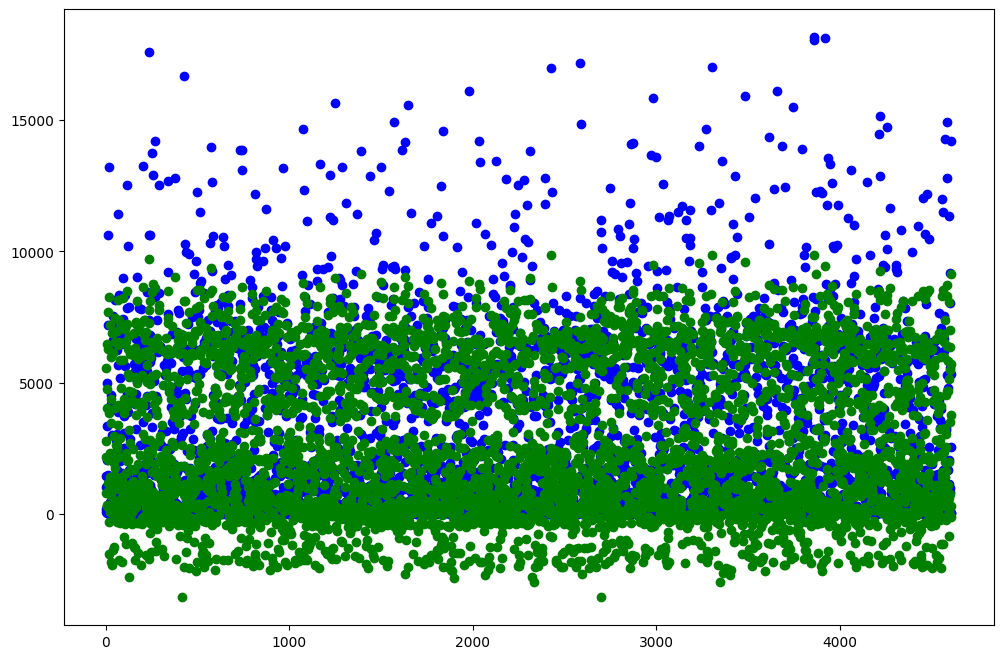

test count     4608.000000
mean      2591.601780
std       3261.570796
min          0.000000
25%        138.000000
50%        943.500000
75%       4776.000000
max      18153.000000
Name: pedestrians count, dtype: float64 AND <class 'pandas.core.series.Series'> und pred count    4608.000000
mean     2625.037326
std      2909.884271
min     -3162.000000
25%       235.000000
50%      1801.500000
75%      5387.000000
max      9877.000000
dtype: float64


In [70]:
fig, ax = plt.subplots(figsize=(12, 8))

ypred = linreg.predict(Xtest)

ypred = pd.Series(ypred) 

plt.scatter(xs, ytest, color ='b')

plt.scatter(xs, ypred, color ='green')

plt.show()

print(f"test {ytest.describe()} AND {type(ytest)} und pred {ypred.describe()}")
# Data scatter of predicted values

In [258]:
sns.pairplot(xs, ytest, data=(ytest, xs), color="blue")
sns.pairplot(xs, ypred, data=(ypred, xs), color="green")
plt.show()


TypeError: pairplot() got multiple values for argument 'data'